In [1]:
import numpy as np
import pandas as pd
# 전체적인 환경설정 용도
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family = font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 훈련용과 테스트용 데이터를 나누어준다.
from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn

from sklearn.neighbors import KNeighborsClassifier

In [2]:
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# 데이터 셋
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons



# Decision Tree
    - 과대적합에 더 예민한
    - 혼잡도가 낮은 변수를 가장 먼저 처리
### Graphviz
   -  http://www.graphviz.org
    - https://graphviz.gitlab.io/_pages/Download/Download_windows.html
    - pip intall graphviz

Decision Tree는  
    순도(homogeneity)가 증가, 불순도(impurity) 혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행

    <순도 계산법>
    
    1.엔트로피(entropy)

        - 엔트로피는 확률 변수의 불확실성을 수치로 나타낸 것. 엔트로피가 높을수록 불확실성이 높은 것.
        - 모든 레코드가 동일한 범주에 속할 경우(=불확실성 최소=순도 최대) 엔트로피는 0
        - 범주가 둘뿐이고 해당 개체의 수가 동일하게 반반씩 섞여 있을 경우(=불확실성 최대=순도 최소) 엔트로피는 1
        - 엔트로피 감소 = 불확실성 감소 = 순도 증가 = 정보 획득

    2. 지니계수
    
        - 0~1의 수
        - 1에 가까우면 불평등, 0에 가까우면 평등

In [3]:
# graphviz 사용시 꼭 필요한 코드
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

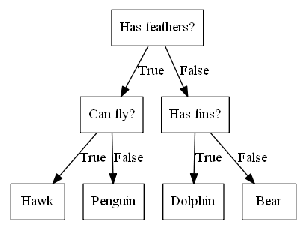

In [4]:
mglearn.plots.plot_animal_tree()

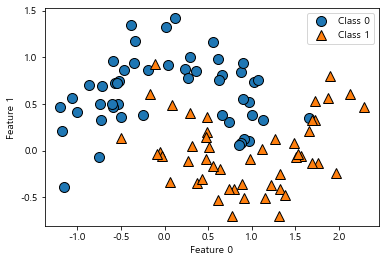

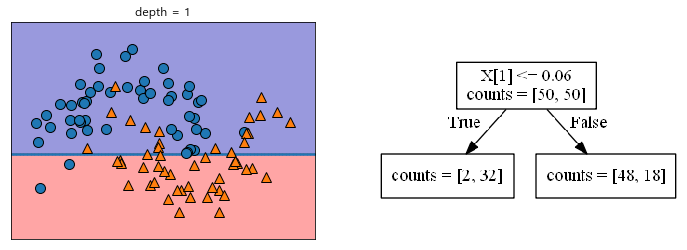

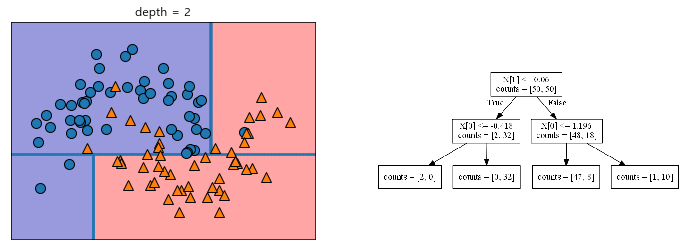

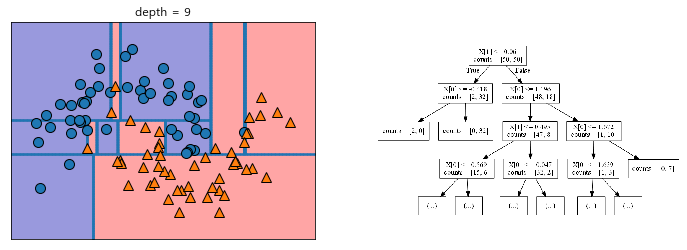

In [5]:
mglearn.plots.plot_tree_progressive()

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
df_clf = DecisionTreeClassifier(random_state = 156)

from sklearn.datasets import load_iris

iris = load_iris()

# 데스트데이터와 훈련데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size = 0.2, random_state = 11)

#데이터 훈련시키기
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

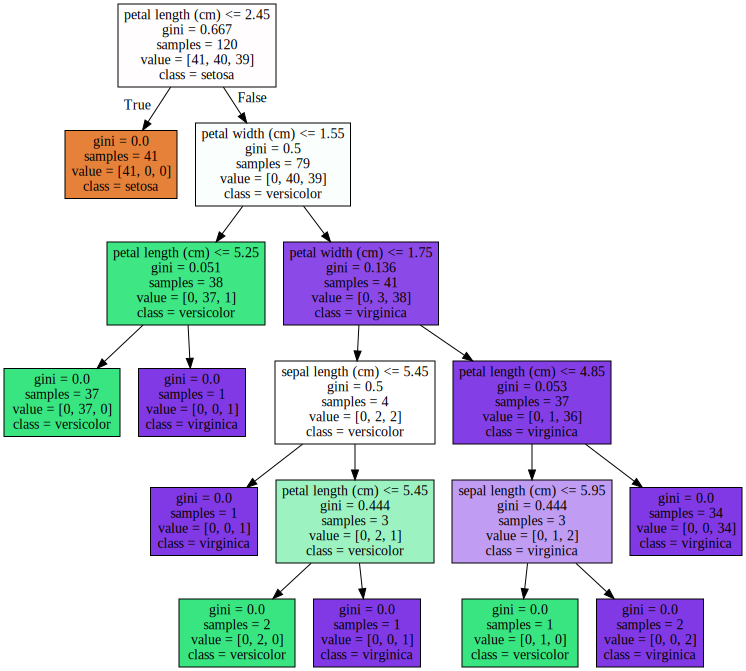

In [8]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(df_clf, out_file = 'data/tree.dot', class_names = iris.target_names, feature_names = iris.feature_names
               ,impurity=True, filled=True)

f = open('data/tree.dot')

dot_graph = f.read()
display(graphviz.Source(dot_graph))
f.close()

### 복잡도 제어  : Prunning(가지치기) 
    - 사전 가지치기
    - 사후 가지치기
    - sklearn 에서는 사후 가지치기만 지원
    - 매개변수 : 
        max_depth : 깊이를 정해준다.
        max_leaf_nodes : 말단 노드의 최대 개수
        mean_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 개수
        mean_samples_split : 노드가 분기할 수 있는 최소 샘플 개수
        max_features : 최적의 분할을 위해 고려할 피처 개수 

#### 가지치기를 하는 이유?  
            모든 terminal node의 순도가 100%인 상태를 Full tree라고 하는데요. 이렇게 Full tree를 생성한 뒤
            적절한 수준에서 terminal node를 결합해주어야 합니다. 왜냐하면 분기가 너무 많아서 학습데이터에
            과적합(overfitting)할 염려가 생기기 때문입니다.

In [9]:
# 깊이와 과대적합의 관계
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train , y_test = train_test_split(cancer.data, cancer.target, 
                                                     stratify = cancer.target, random_state = 42)


tree = DecisionTreeClassifier(random_state = 0, max_depth = 4).fit(X_train, y_train)
tree
print('train :' , tree.score(X_train, y_train))
print('test :', tree.score(X_test, y_test))

train : 0.9882629107981221
test : 0.951048951048951


In [10]:
# 가장 중요하게 생각하는 변수

for name, value in zip(cancer.feature_names, tree.feature_importances_):
    print(name, value)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


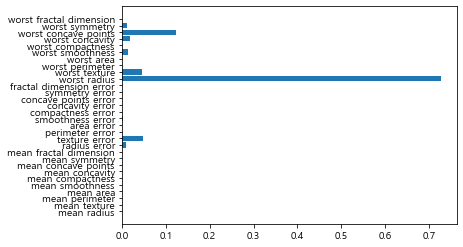

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
plot_feature_importances_cancer(tree)

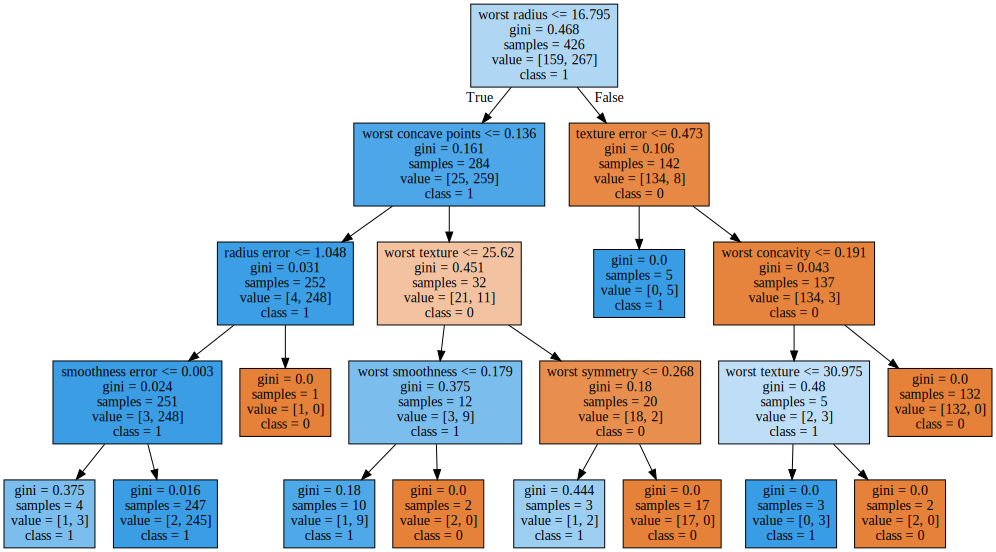

In [12]:
export_graphviz(tree, out_file = 'data/tree.dot', 
                class_names = ['0','1'], feature_names = cancer.feature_names
               ,impurity=True, filled=True)

f = open('data/tree.dot')

dot_graph = f.read()
display(graphviz.Source(dot_graph))
f.close()

### 사례 1 : IRIS

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['result'] = iris.target
df

X = iris.data[:, [2,3]]
y = iris.target


# 데스트데이터와 훈련데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

df_clf = DecisionTreeClassifier(random_state = 0, max_depth = 3).fit(X_train, y_train)

print('train :' , df_clf.score(X_train, y_train))
print('test :', df_clf.score(X_test, y_test))

train : 0.9821428571428571
test : 0.9736842105263158


### 사례 2 : 서울지역 동 분류

In [14]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]


In [15]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [16]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]


In [17]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [18]:
train_df.label.value_counts()
test_df.label.value_counts()

Gangdong    5
Gangseo     5
Gangnam     5
Gangbuk     5
Name: label, dtype: int64

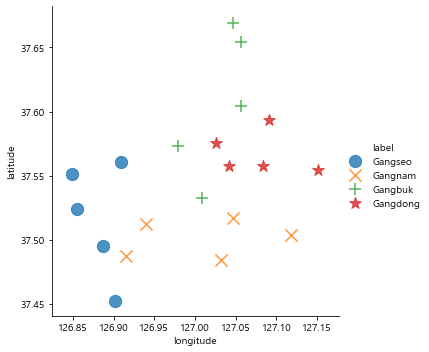

In [19]:
sns.lmplot('longitude','latitude', data = train_df, fit_reg = False, hue = 'label', markers = ['o','x','+','*'],
          scatter_kws = {'s': 150})

In [20]:
train_df.drop(['district'], axis = 1, inplace = True)
test_df.drop(['dong'], axis = 1, inplace = True)

In [21]:
train_df
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [22]:
X_train = train_df[['longitude','latitude']]
y_train = train_df[['label']]

X_test = train_df[['longitude','latitude']]
y_test = train_df[['label']]

In [23]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [24]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encode)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=35, splitter='best')

In [25]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
print('정확도 :', accuracy_score(y_test.values, le.classes_[pred]))

정확도 : 1.0


train : 0.9859154929577465
test : 0.958041958041958


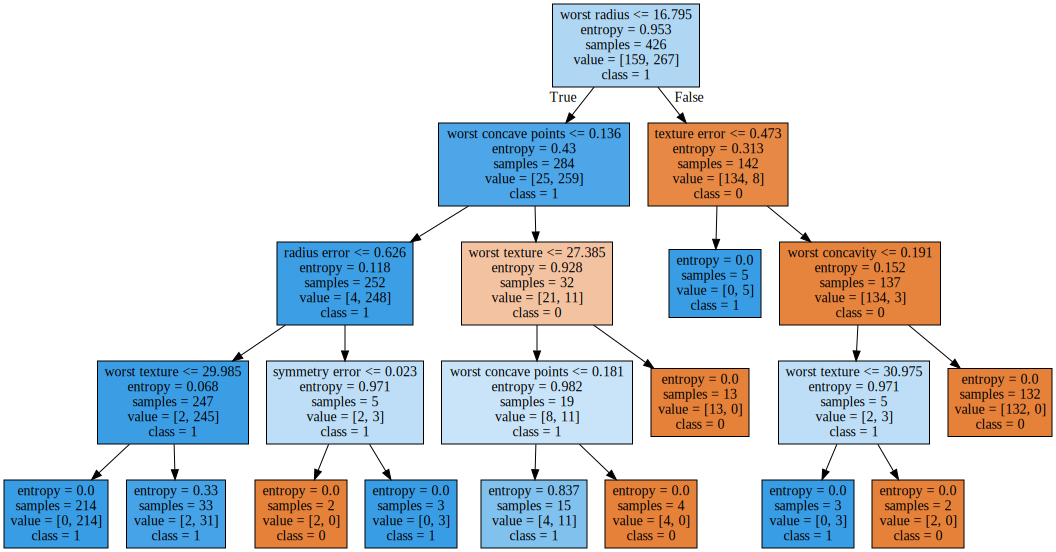

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train , y_test = train_test_split(cancer.data, cancer.target, 
                                                     stratify = cancer.target, random_state = 42)


tree = DecisionTreeClassifier(random_state = 0, max_depth = 4, criterion = 'entropy').fit(X_train, y_train)
tree
print('train :' , tree.score(X_train, y_train))
print('test :', tree.score(X_test, y_test))

export_graphviz(tree, out_file = 'data/tree.dot', 
                class_names = ['0','1'], feature_names = cancer.feature_names
               ,impurity=True, filled=True)

f = open('data/tree.dot')

dot_graph = f.read()
display(graphviz.Source(dot_graph))
f.close()

## Random Forest
    - 랜덤포레스트는 같은 데이터에 의사결정나무 여러 개를 동시에 적용해서 학습성능을 높이는 앙상블 기법입니다.
       나무(tree)가 여럿 있다고 하는 의미에서 forest라는 이름이 붙었습니다.
    - 조건을 랜덤으로 선택하기 때문에 조건이 중복되거나 빠질 가능성이 있음
    - 배깅 : 중복을 허용하여 샘플링하는 방식
    - 나무의 개수에 따라 성능이 달라짐
    - 앙상블 : 여러개의 알고리즘을 동시에 사용해서 시너지를 증폭시킴***
   

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [28]:
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, stratify = y)

In [29]:
forest = RandomForestClassifier(random_state = 2, n_estimators=5).fit(X_train, y_train)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

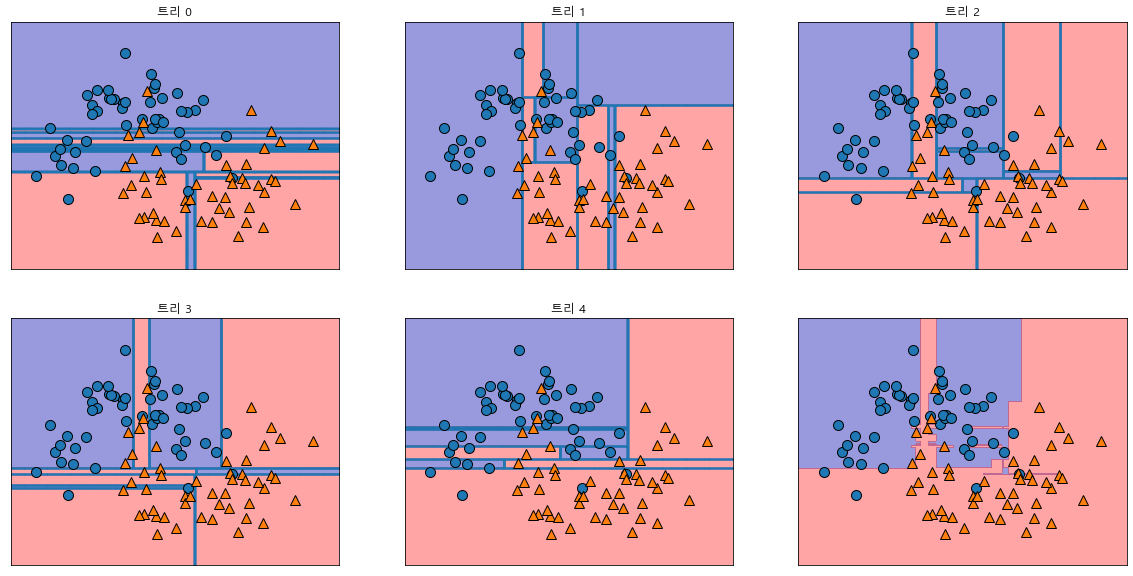

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [31]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train , y_test = train_test_split(cancer.data, cancer.target, 
                                                     stratify = cancer.target, random_state = 42)


forest= RandomForestClassifier(random_state = 0, n_estimators=100).fit(X_train, y_train)
tree
print('train :' , forest.score(X_train, y_train))
print('test :', forest.score(X_test, y_test))

train : 1.0
test : 0.958041958041958


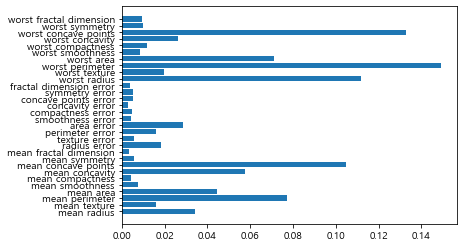

In [32]:
plot_feature_importances_cancer(forest)

### 사례 3 :  손글씨 이미지

In [33]:
from sklearn.datasets import load_digits

mnist = load_digits()

mnist.data.shape
mnist.target

features, labels = mnist.data,mnist.target

In [34]:
from sklearn.model_selection import cross_val_score

# 교차 검증 :  데이터의 모든 부분을 사용하여 모델을 검증하고, test set을 하나로 고정하지 않는다.
def cross_validation(clf, features, labels):
    cv_scores = []
    for i in range(15):
        # clf 방식(넘겨준 방식)으로 훈련을 하면서 추가로 교차검증을 해줌
        # cv = cross validation
        scores = cross_val_score(clf, features, labels, scoring= 'accuracy', cv = 10)
        cv_scores.append(scores.mean())
        
    return cv_scores





In [35]:
df_cv_scores = cross_validation(DecisionTreeClassifier(), features, labels)
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


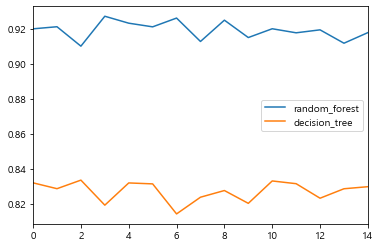

In [36]:
cv_list = [['random_forest',rf_cv_scores],['decision_tree', df_cv_scores]]
df = pd.DataFrame.from_items(cv_list)
df.plot()

In [37]:
print(np.mean(df_cv_scores))
print(np.mean(rf_cv_scores))

0.8272541259619338
0.9191433402486288


### 사례 4 . 독버섯데이터
    - https://archive.ics.uci.edu/ml/index.php

In [38]:
mr = pd.read_csv('data/mushrooms.csv', header = None)

mr.head()
#mr.shape

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [39]:
# null 값이 있는지 확인
mr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [40]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [41]:
# 정답 데이터와 훈련데이터로 나누기
X = mr.drop(0,axis = 1)
y = mr[0]

In [42]:
# 문자형을 머신러닝 시킬 수 있도록 숫자형으로 변경해주기
from sklearn.preprocessing import LabelEncoder

le_x = LabelEncoder()
for col in X.columns:
    X[col] = le_x.fit_transform(X[col])
    
le_y = LabelEncoder()

y = le_y.fit_transform(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [44]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print('정답률 :', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정답률 : 0.999507631708518
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       1.00      1.00      1.00       984

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [45]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression().fit(X,y)

pred2 = clf2.predict(X_test)

print('정답률 :', accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

정답률 : 0.9502708025603152
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1047
           1       0.95      0.95      0.95       984

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier().fit(X,y)

pred3 = clf3.predict(X_test)

print('정답률 :', accuracy_score(y_test, pred3))
print(classification_report(y_test, pred3))

정답률 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       1.00      1.00      1.00       984

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier().fit(X,y)

pred4 = clf4.predict(X_test)

print('정답률 :', accuracy_score(y_test, pred4))
print(classification_report(y_test, pred4))

정답률 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       1.00      1.00      1.00       984

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
# 정규화
X = pd.get_dummies(X, columns = X.columns, drop_first = True)

In [49]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
clf5 = LogisticRegression().fit(X,y)

pred5 = clf5.predict(X_test)

print('정답률 :', accuracy_score(y_test, pred5))
print(classification_report(y_test, pred5))

정답률 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       1.00      1.00      1.00       984

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Gradient Boosting Regression Tree
    - 랜덤포레스트의 보완기능
    - 랜덤포레스트와 같은 방식이나 변수를 무작위로 선정하지 않고, 알고리즘을 통해 선정한다.
    - 회귀와 분류에서 모두 사용가능. 
    - 이전 트리의 오차를 보완하는 방식으로 트리를 생성함.(경사하강법 사용)
    - 강력한 사전 가지치기 사용 가능
    - 랜덤포레스트보다 매게변수 선정에 빈감, 하지만 잘 조정하면 더 높은 정확도를 제공
    - learning_rate를 사용하여 오차 보정
    - XG Boost, LightGBM -> 속도문제를 보완해줌

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [52]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

In [53]:
# 기본값 : 깊이는 3 트리의 개수는 100, learning_rate = 0.1
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print('훈련정확도 :', tree.score(X_train, y_train))
print('테스트정확도 :', tree.score(X_test, y_test))

훈련정확도 : 1.0
테스트정확도 : 0.958041958041958


In [54]:
tree = GradientBoostingClassifier(random_state=0, max_depth = 1).fit(X_train, y_train)

print('훈련정확도 :', tree.score(X_train, y_train))
print('테스트정확도 :', tree.score(X_test, y_test))

훈련정확도 : 0.9906103286384976
테스트정확도 : 0.965034965034965


In [55]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print('훈련정확도 :', tree.score(X_train, y_train))
print('테스트정확도 :', tree.score(X_test, y_test))

훈련정확도 : 0.9929577464788732
테스트정확도 : 0.958041958041958
